In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("C:\\Users\\ShIzm\\OneDrive\\デスクトップ\\Folder\\Data_Science\\Source\\20200418_CompanyFinancialDataA_prepared.csv") as data_csv:
    data=pd.read_csv(data_csv)

In [3]:
datasetA=data.copy()
datasetA=datasetA.drop(["銘柄"],axis=1)

In [4]:
train_data=datasetA.drop("株価急騰",axis=1)
train_label=datasetA["株価急騰"].copy()

In [5]:
import numpy as np

data_num=train_data.drop("CF状態",axis=1)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data_num_prepared=scaler.fit_transform(data_num)

data_text=np.zeros((len(train_data["CF状態"]),8))
data_text_prepared=df(data_text)
data_text=df(train_data["CF状態"])
for i in range(len(data_text)):
    if data_text.iat[i,0]=="健全":
        data_text_prepared.iat[i,0]=1
    elif data_text.iat[i,0]=="積極":
        data_text_prepared.iat[i,1]=1
    elif data_text.iat[i,0]=="停滞":
        data_text_prepared.iat[i,2]=1
    elif data_text.iat[i,0]=="初期":
        data_text_prepared.iat[i,3]=1
    elif data_text.iat[i,0]=="再建":
        data_text_prepared.iat[i,4]=1
    elif data_text.iat[i,0]=="危機":
        data_text_prepared.iat[i,5]=1
    elif data_text.iat[i,0]=="留保":
        data_text_prepared.iat[i,6]=1
    elif data_text.iat[i,0]=="返済":
        data_text_prepared.iat[i,7]=1

c=np.arange(len(data_num_prepared))
data_num_dataframe=df(data_num_prepared,index=c)
data_text_dataframe=df(data_text_prepared,index=c)
data_num_dataframe.index.names=["index"]
data_text_dataframe.index.names=["index"]
train_data_prepared=df.merge(data_num_dataframe,data_text_dataframe,on="index")

In [6]:
train_label_prepared=train_label.copy()
train_label_prepared=train_label_prepared.astype("float64")
train_label_prepared=df(train_label_prepared)
for i in range(len(train_label_prepared)):
    train_label_prepared.iat[i,0]=train_label_prepared.iat[i,0]*100

In [7]:
with open("C:\\Users\\ShIzm\\OneDrive\\デスクトップ\\Folder\\Data_Science\\Source\\20200418_CompanyFinancialDataB_prepared.csv") as data_csv:
    data=pd.read_csv(data_csv)

In [8]:
datasetB=data.copy()
datasetB=datasetB.drop(["銘柄"],axis=1)

In [9]:
test_data=datasetB.drop("株価急騰",axis=1)
test_label=datasetB["株価急騰"].copy()

In [10]:
data_num=test_data.drop("CF状態",axis=1)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data_num_prepared=scaler.fit_transform(data_num)

data_text=np.zeros((len(test_data["CF状態"]),8))
data_text_prepared=df(data_text)
data_text=df(test_data["CF状態"])
for i in range(len(data_text)):
    if data_text.iat[i,0]=="健全":
        data_text_prepared.iat[i,0]=1
    elif data_text.iat[i,0]=="積極":
        data_text_prepared.iat[i,1]=1
    elif data_text.iat[i,0]=="停滞":
        data_text_prepared.iat[i,2]=1
    elif data_text.iat[i,0]=="初期":
        data_text_prepared.iat[i,3]=1
    elif data_text.iat[i,0]=="再建":
        data_text_prepared.iat[i,4]=1
    elif data_text.iat[i,0]=="危機":
        data_text_prepared.iat[i,5]=1
    elif data_text.iat[i,0]=="留保":
        data_text_prepared.iat[i,6]=1
    elif data_text.iat[i,0]=="返済":
        data_text_prepared.iat[i,7]=1

c=np.arange(len(data_num_prepared))
data_num_dataframe=df(data_num_prepared,index=c)
data_text_dataframe=df(data_text_prepared,index=c)
data_num_dataframe.index.names=["index"]
data_text_dataframe.index.names=["index"]
test_data_prepared=df.merge(data_num_dataframe,data_text_dataframe,on="index")

In [11]:
test_label_prepared=test_label.copy()
test_label_prepared=test_label_prepared.astype("float64")
test_label_prepared=df(test_label_prepared)
for i in range(len(test_label_prepared)):
    test_label_prepared.iat[i,0]=test_label_prepared.iat[i,0]*100

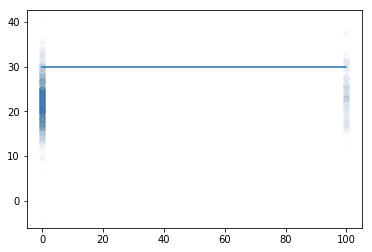

In [12]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet()
elastic_net.fit(train_data_prepared,train_label_prepared)

x1=test_label_prepared
y1=elastic_net.predict(test_data_prepared)
plt.scatter(x1,y1,alpha=0.01)
plt.plot([0,100],[30,30])

In [13]:
from sklearn.metrics import mean_squared_error as mse

def learning_curves(model,x_train,x_val,y_train,y_val):
    train_errors,val_errors=[],[]
    for i in range(1,len(x_train)):
        model.fit(x_train[:i],y_train[:i])
        y_train_predict=model.predict(x_train[:i])
        y_val_predict=model.predict(x_val)
        train_errors.append(mse(y_train_predict,y_train[:i]))
        val_errors.append(mse(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r",label="train")
    plt.plot(np.sqrt(val_errors),"b",label="val")

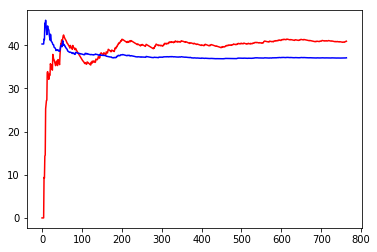

In [14]:
learning_curves(elastic_net,train_data_prepared,test_data_prepared,train_label_prepared,test_label_prepared)

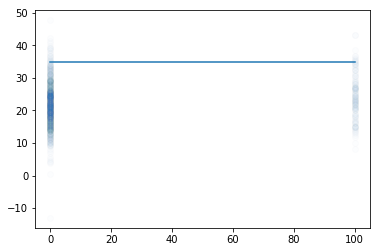

In [15]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.8)
lasso_reg.fit(train_data_prepared,train_label_prepared)

x2=test_label_prepared
y2=lasso_reg.predict(test_data_prepared)
plt.scatter(x2,y2,alpha=0.01)
plt.plot([0,100],[35,35])

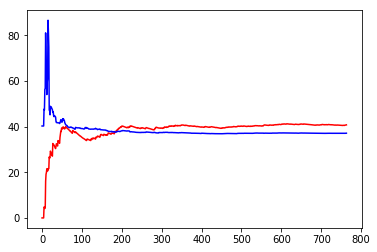

In [16]:
learning_curves(lasso_reg,train_data_prepared,test_data_prepared,train_label_prepared,test_label_prepared)

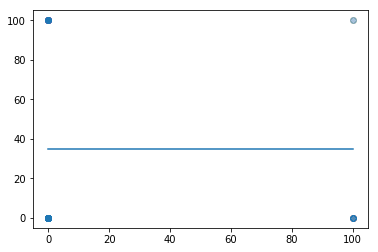

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(train_data_prepared,train_label_prepared)

x3=test_label_prepared
y3=tree_reg.predict(test_data_prepared)
plt.scatter(x3,y3,alpha=0.01)
plt.plot([0,100],[35,35])

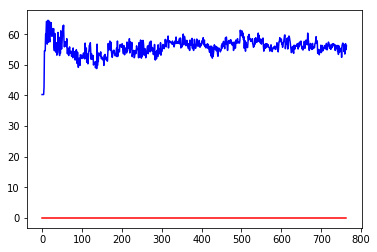

In [19]:
learning_curves(tree_reg,train_data_prepared,test_data_prepared,train_label_prepared,test_label_prepared)

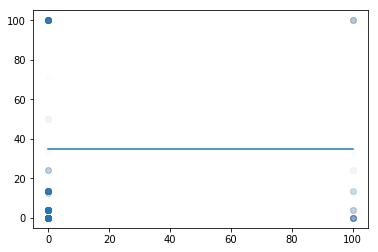

In [20]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=10)
tree_reg.fit(train_data_prepared,train_label_prepared)

x3=test_label_prepared
y3=tree_reg.predict(test_data_prepared)
plt.scatter(x3,y3,alpha=0.01)
plt.plot([0,100],[35,35])

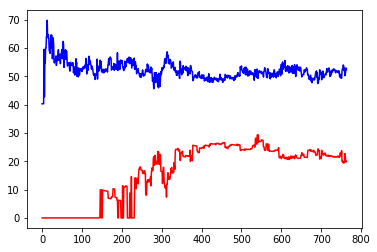

In [21]:
learning_curves(tree_reg,train_data_prepared,test_data_prepared,train_label_prepared,test_label_prepared)

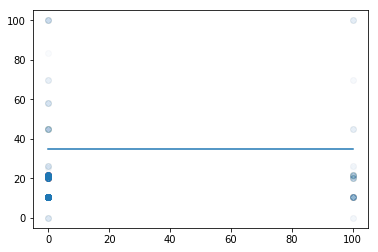

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=5)
tree_reg.fit(train_data_prepared,train_label_prepared)

x3=test_label_prepared
y3=tree_reg.predict(test_data_prepared)
plt.scatter(x3,y3,alpha=0.01)
plt.plot([0,100],[35,35])

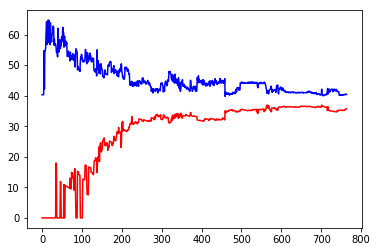

In [23]:
learning_curves(tree_reg,train_data_prepared,test_data_prepared,train_label_prepared,test_label_prepared)

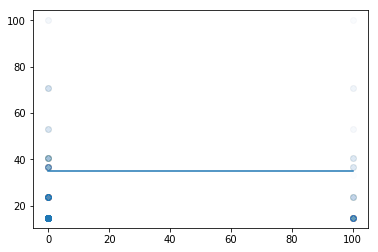

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=3)
tree_reg.fit(train_data_prepared,train_label_prepared)

x3=test_label_prepared
y3=tree_reg.predict(test_data_prepared)
plt.scatter(x3,y3,alpha=0.01)
plt.plot([0,100],[35,35])

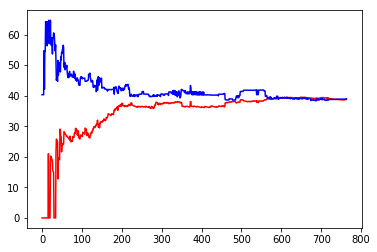

In [25]:
learning_curves(tree_reg,train_data_prepared,test_data_prepared,train_label_prepared,test_label_prepared)

In [15]:
from sklearn.ensemble import RandomForestRegressor as rfr
rfr_reg=rfr(n_estimators=500,max_leaf_nodes=10)
rfr_reg.fit(train_data_prepared,train_label_prepared)

C:\Users\ShIzm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=10,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
prnrfr.feature_importances_